# Results R1a: What sentiments and topics are present in the letter chunks (EDA & Single Level Model)?

## Resources

In [3]:
# Get Packages & Libraries
library(tidyverse)
library(rethinking)
library(ggridges)
library(patchwork) 
library(gghighlight)

In [4]:
# Functions
factorize <- function(df){ # Create a function
  for(i in which(sapply(df, class) == "character")) # that looks for variables with the character class 
      df[[i]] = as.factor(df[[i]]) # and converts them to factor (i.e., categorical) class
  return(df)
}

st <- function(x){
    (x-mean(x,na.rm=TRUE))/sd(x,na.rm=TRUE)
}

In [5]:
# Settings
options(scipen=999)

In [6]:
# Get Data
# View Data
df  <- read.csv("20240611_PhD_FinalData-LtrChk.csv")
df[df == ''] <- NA #replace blank cells with NA
df <- factorize(df)
df <- df[,-1]
#colnames(df)
glimpse(df)

Rows: 2,392
Columns: 37
$ docID.AT         <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16…
$ docid            <fct> 20910, 21062, 21062, 21324, 21334, 21334, 21354, 2135…
$ docyear          <int> 1891, 1871, 1871, 1892, 1891, 1891, 1890, 1890, 1800,…
$ docmonth         <dbl> 7, 11, 11, 5, 10, 10, 2, 2, 3, 3, 3, 1, 1, 1, 1, 1, 1…
$ authorName       <fct> Isabella Weir Moore, E. Rothwell, E. Rothwell, Isabel…
$ docauthorid      <fct> IED0107, IED0179, IED0179, IED0107, IED0621, IED0621,…
$ authorLocation   <fct> USA, Canada, Canada, USA, USA, USA, USA, USA, USA, US…
$ authorGender     <fct> F, F, F, F, F, F, M, M, F, F, F, F, F, F, F, F, F, F,…
$ nationalOrigin   <fct> Irish, Irish, Irish, Irish, Irish, Irish, Irish, Iris…
$ irish            <fct> True, True, True, True, True, True, True, True, True,…
$ otherUK          <fct> False, False, False, False, False, False, False, Fals…
$ relMin           <fct> NA, NA, NA, NA, False, False, NA, NA, NA, NA, NA, NA,…
$ catholic      

## Sentiment

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-0.9907  0.0101  0.1202  0.1425  0.2468  0.9955 

[1] 0.2905867

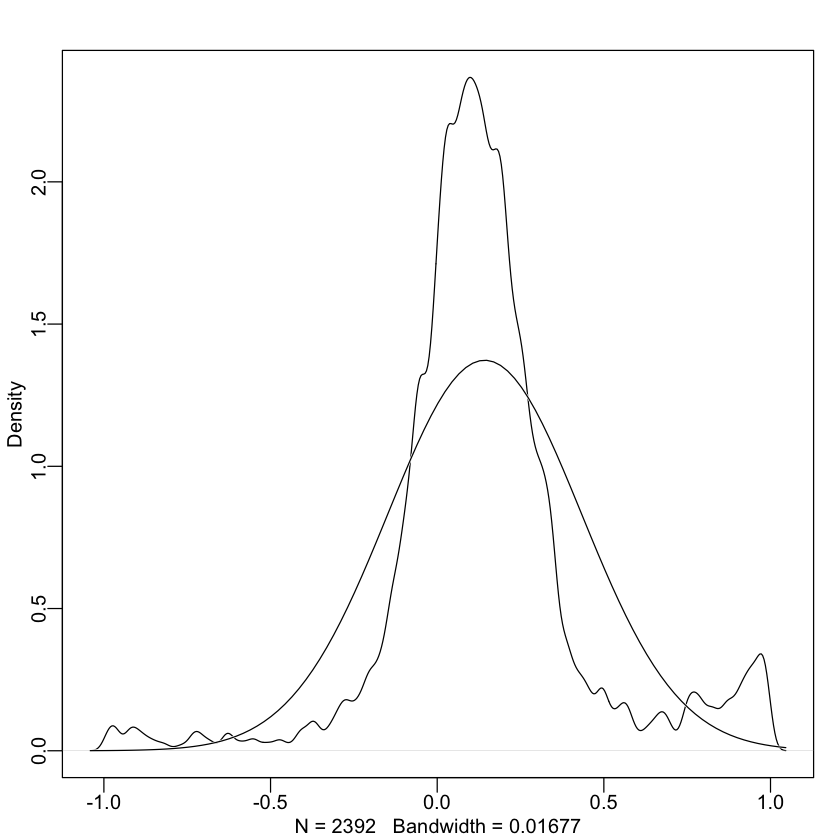

In [8]:
# Actual Data - Compound Sentiment
dens(df$scoreCom, norm.comp=TRUE)
summary(df$scoreCom)
sd(df$scoreCom)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    2.00    4.00   13.75    9.00  460.00 

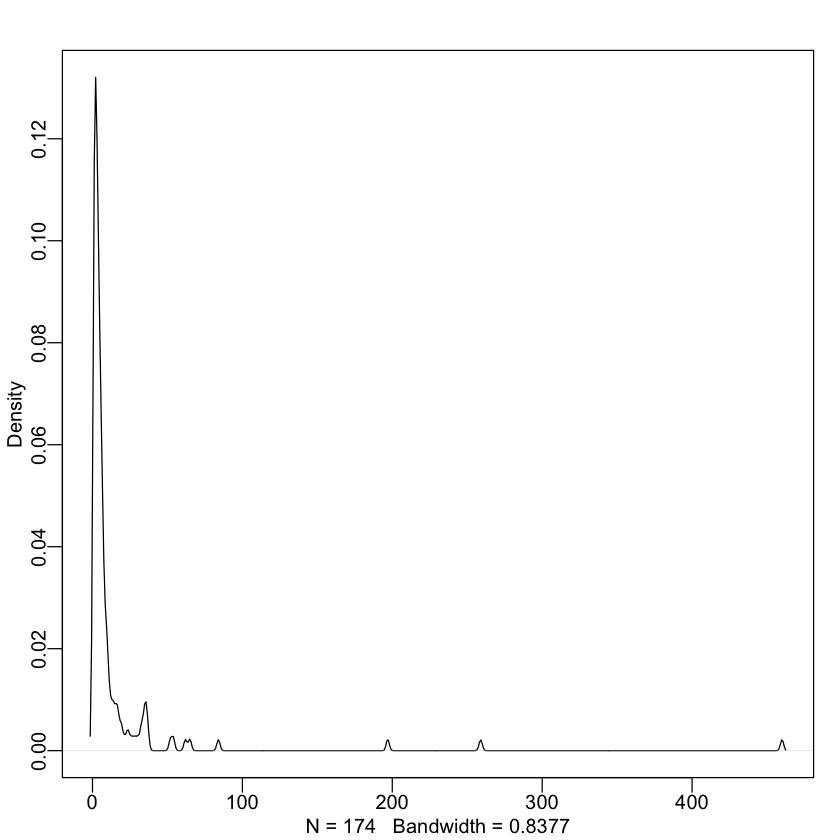

In [9]:
counts <- df %>% 
group_by(docauthorid) %>% 
count() %>%
arrange(desc(n)) %>% 
pull(n)

dens(counts)
summary(counts)

In [10]:
authorRep <- df %>% 
#filter(!is.na(authorName))%>%
group_by(authorName) %>% 
count() %>%
arrange(desc(n)) %>% 
filter (n >= 10)

authorRep

idsRep <- df %>% 
#filter(!is.na(authorName))%>%
group_by(docauthorid) %>% 
count() %>%
arrange(docauthorid) %>% 
filter (n >= 10)

#idsRep

authorName,n
<fct>,<int>
Susannah Strickland Moodie,460
Sarah Stretch Harris,259
NA,215
Mary Cumming,197
Isabella Marshall Allen,84
Agnes Shakespeare,65
Alexander Robb,62
Ellen S. Dunlop,54
Critchlow Harris,52


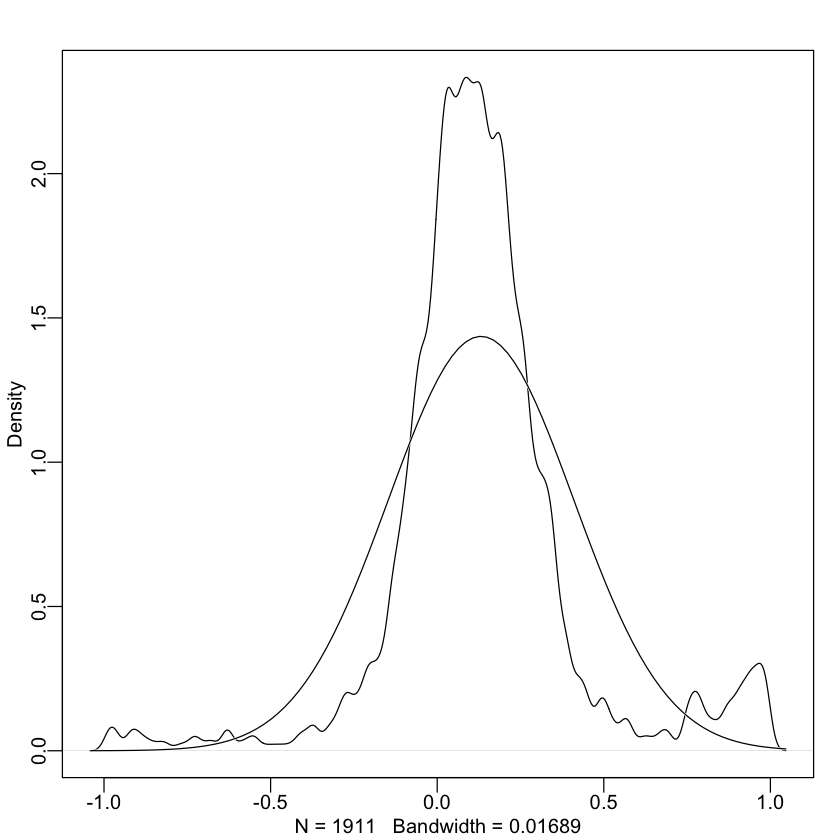

In [70]:
# Highly represented authors
df2 <- df %>% 
group_by(docauthorid) %>% 
count() %>%
arrange(desc(n)) %>% 
filter (n >= 10) 

ids  <- df2 %>%
pull(docauthorid)

df2 <- df[df$docauthorid %in% ids, ]

dens(df2$scoreCom, norm.comp = TRUE)

In [12]:
df2 %>%
distinct(authorName, authorGender, nationalOrigin, docauthorid) %>%
arrange(docauthorid)

authorName,authorGender,nationalOrigin,docauthorid
<fct>,<fct>,<fct>,<fct>
Ada C. Edgar,F,Irish,IED0030
Agnes Shakespeare,F,Irish,IED0037
Isabella Weir Moore,F,Irish,IED0107
Caledon,M,Irish,IED0125
Ellen S. Dunlop,F,Irish,IED0212
George McCann,M,Irish,IED0233
Hannah B. Longstreet,F,Irish,IED0267
Hester Habersham,F,Irish,IED0294
Isabella Marshall Allen,F,Irish,IED0314


In [13]:
# Add column for to order by counts
df2 <- left_join(df2, idsRep, by = "docauthorid")

#df2 %>%
#distinct(docauthorid, n) %>% 
#arrange(n)

docauthorid,min,mean,max,sd
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
IED0692,-0.96,0.40,0.99,0.68
IED0958,-0.90,0.40,0.99,0.39
IED0212,-0.99,0.36,1.00,0.65
IED0572,-0.16,0.30,0.95,0.36
per0026978a,-0.92,0.30,0.96,0.49
per0036140,0.10,0.29,0.69,0.16
IED0403,-0.87,0.28,0.98,0.56
IED0107,-0.97,0.26,0.99,0.64
IED0294,-0.89,0.26,0.98,0.44


Picking joint bandwidth of 0.103



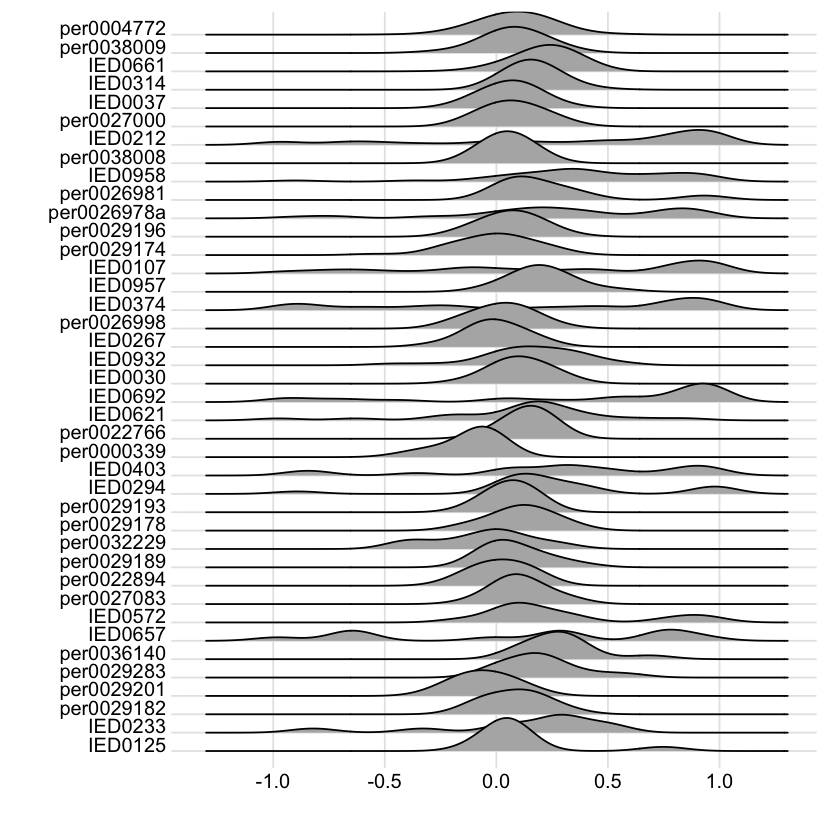

In [14]:
df2 %>% 
select(docauthorid, scoreCom) %>% 
group_by(docauthorid) %>% 
summarize(min = round(min(scoreCom), digits = 2),
          mean = round(mean(scoreCom), digits = 2),
          max = round(max(scoreCom), digits = 2), 
          sd = round(sd(scoreCom), digits = 2))%>%
arrange(desc(mean))

p1  <- ggplot(df2, aes(x = scoreCom, y = reorder(docauthorid, n))) +
  geom_density_ridges() +
theme_ridges() + 
  theme(legend.position = "none") + 
xlab("") +
ylab("")

p1

No obvious pattern here. Trying the same image ordered by compound sentiment score.

In [15]:
# First let's note the location of the Frequent writers
df2$Prolific <- "Not Prolific"
df2$Prolific[df2$docauthorid == "per0004772"] <- "Susanna Moodie"
df2$Prolific[df2$docauthorid == "IED0661"] <- "Mary Cumming"
df2$Prolific[df2$docauthorid == "per0038009"] <- "Sarah Harris"
df2$Prolific<-as.factor(df2$Prolific)
summary(df2$Prolific)

Mary Cumming   Not Prolific   Sarah Harris Susanna Moodie 
           197            995            259            460

In [16]:
#levels(df2$Prolific)
df2$Prolific <- factor(df2$Prolific, levels = c("Mary Cumming", "Susanna Moodie", "Sarah Harris", "Not Prolific"))
#levels(df2$Prolific)

Picking joint bandwidth of 0.103

Saving 7 x 7 in image
Picking joint bandwidth of 0.103



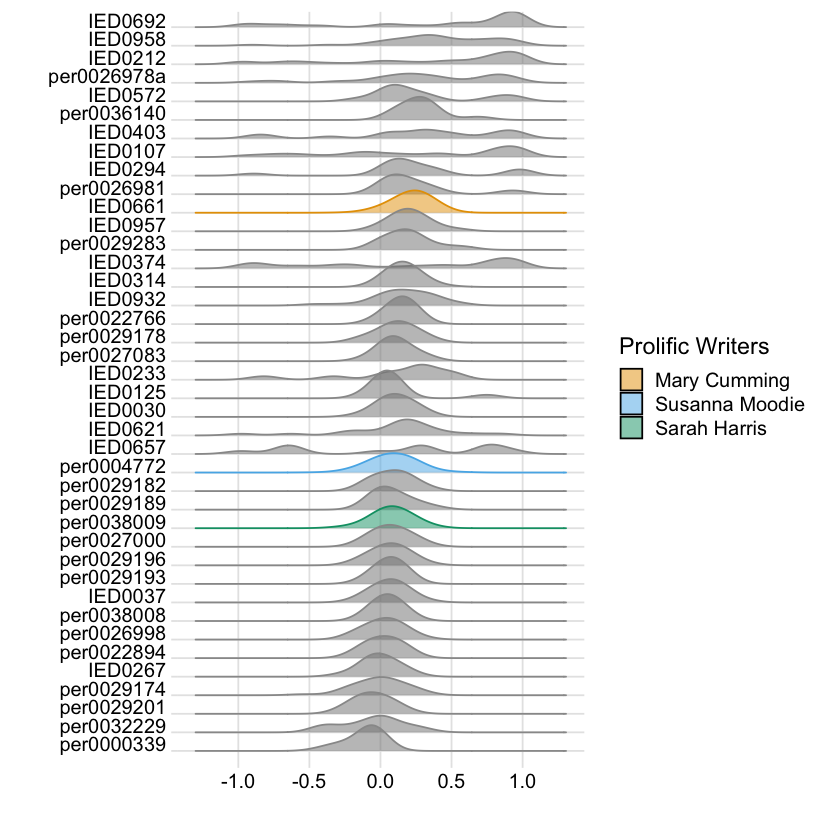

In [17]:
p1  <- ggplot(df2, aes(x = scoreCom, y = reorder(docauthorid, scoreCom), color = Prolific, fill = Prolific)) +
  geom_density_ridges(alpha = .5, scale = 1.5) + #fill = "darkgrey", alpha = .5, scale = .3
theme_ridges() + 
  theme() + 
guides(fill = guide_legend(title = "Prolific Writers"))+
xlab("") +
ylab("")+
  scale_fill_manual(values = c("#E69F00", "#56B4E9", "#009E73","#999999"), limits = c('Mary Cumming', "Susanna Moodie", 'Sarah Harris')) +
  scale_color_manual(values = c("#E69F00", "#56B4E9", "#009E73","#999999"), guide = "none") 

p1 
#ggsave("20250314_PhD_LtrChkFrqWrt.jpg")

Now this shows a pattern whereby IED authors are showing more non-normal distributions. Checking out some of the texts to see if the cause is likely lack of punctuation. 

In [18]:
df %>%
filter(docauthorid == "IED0692") %>%
pull(scoreCom) 

[1]  0.93420000  0.90720000  0.50045000 -0.92970000  0.91160000  0.97370000
 [7]  0.86950000  0.94260000  0.60240000  0.02253333  0.94210000 -0.95790000
[13] -0.42430000  0.06440000  0.78880000 -0.75990000 -0.63530000  0.56270000
[19]  0.26830000  0.99120000  0.78400000  0.94800000  0.96500000

It does appear that lack of  full-stops (i.e., periods) is probably why the compound sentiment scores are non-normal. In general, what is the distribution like for low to medium represented writers?

In [89]:
df$source<-NA
df$source[grepl('IED', df$docauthorid)]<-"IED"
df$source[grepl('per', df$docauthorid)]<-"NAILDOH"
df$source <- as.factor(df$source)
summary(df$source)

IED NAILDOH 
    967    1425

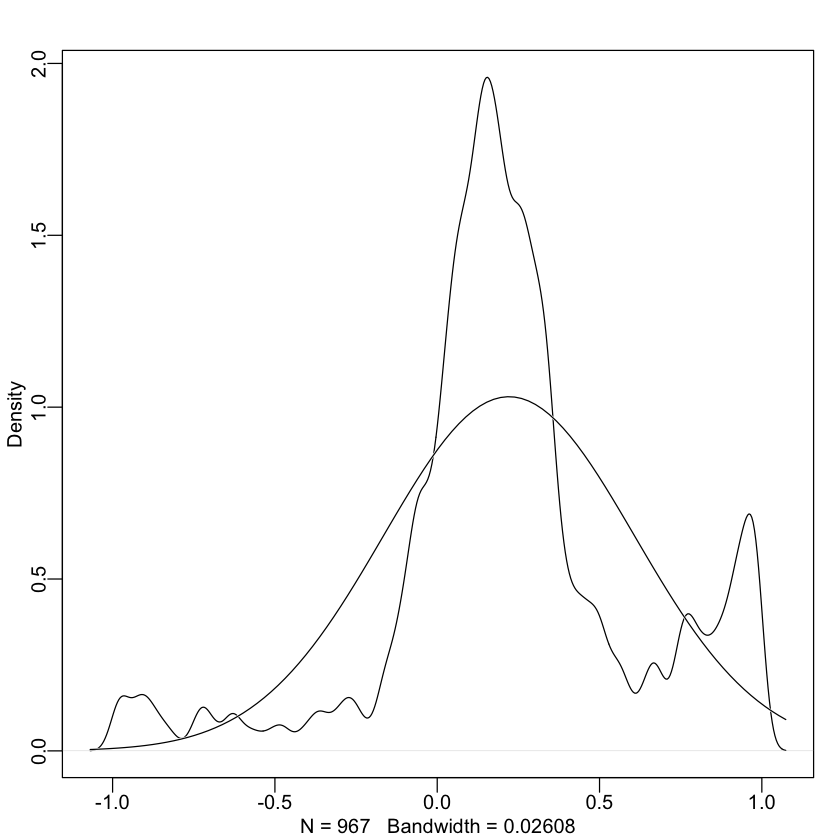

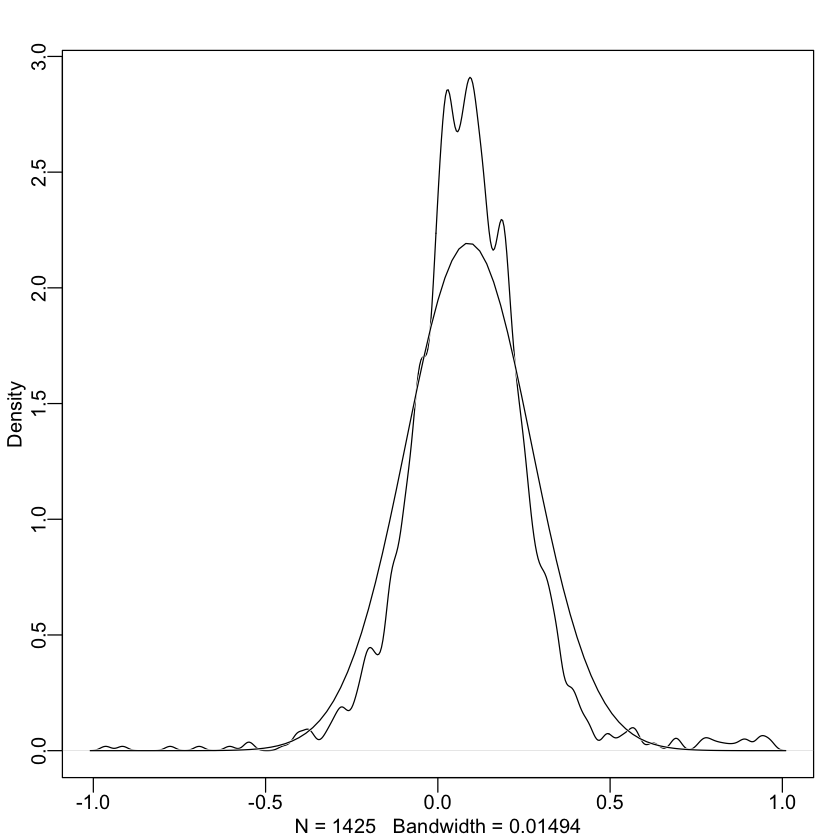

In [20]:
df%>%
filter(source=="IED")%>%
pull(scoreCom)%>%
dens(norm.comp = TRUE)

df%>%
filter(source=="NAILDOH")%>%
pull(scoreCom)%>%
dens(norm.comp = TRUE)

NAILDOH is close to normal except for the higher central peak. The IED has a high central peak, thick tails and secondary bumps near the extremes. Nice looking graphs...

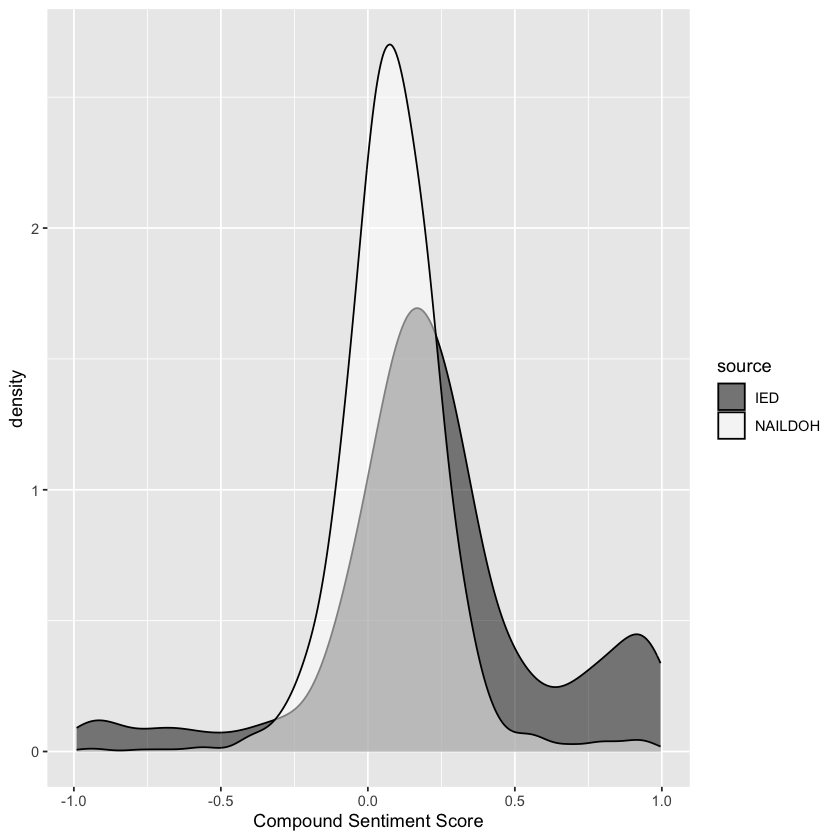

In [21]:
p1 <- ggplot(data=df, aes(x=scoreCom, group=source, fill=source)) +
    geom_density(adjust=1.5, alpha=.5) +
scale_fill_manual(values = c("black", "white")) +
  scale_color_manual(values = c("#black", "white"), guide = "none") +
xlab("Compound Sentiment Score")
p1

#ggsave("20250314_PhD_LtrChkSenSrc.jpg")


Saving 7 x 7 in image


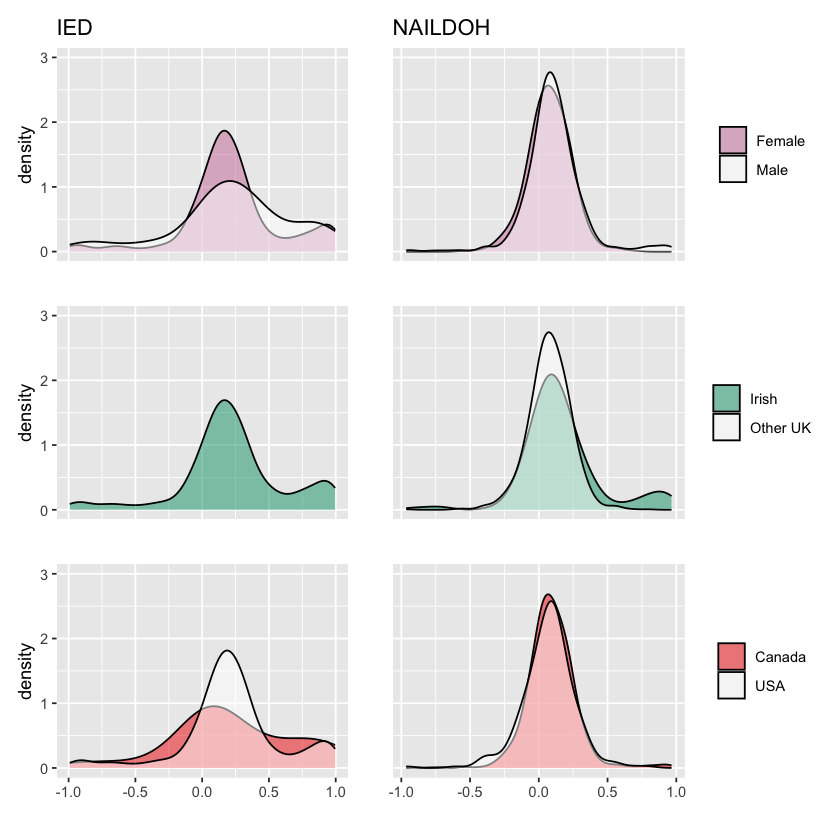

In [22]:
df2 <- df[df$source=="IED", ]
df2$irish <- as.character(df2$irish)
df2$irish[df2$irish=="True"]<-"Irish"
df2$irish[df2$irish=="False"]<-"Other UK"
df2$irish <- as.factor(df2$irish)
df2$authorGender <- as.character(df2$authorGender)
df2$authorGender[df2$authorGender=="F"]<-"Female"
df2$authorGender[df2$authorGender=="M"]<-"Male"
df2$authorGender <- as.factor(df2$authorGender)

p1 <- ggplot(data=df2, aes(x=scoreCom, group=authorGender, fill=authorGender)) +
ggtitle("IED")+
    geom_density(adjust=1.5, alpha=.5) +
scale_fill_manual(values = c("#CC79A7", "white")) +
  scale_color_manual(values = c("#CC79A7", "white"), guide = "none") +
xlab("")+
#ylab("")+
theme(legend.position="none", 
      axis.text.x = element_blank(), 
      axis.ticks.x = element_blank(),
      legend.title=element_blank())+
coord_cartesian(ylim=c(0, 3))

p2 <- ggplot(data=df2, aes(x=scoreCom, group=irish, fill=irish)) +
    geom_density(adjust=1.5, alpha=.5) +
scale_fill_manual(values = c("#009E73", "white")) +
  scale_color_manual(values = c("#009E73", "white"), guide = "none") +
xlab("")+
#ylab("")+
theme(legend.position="none", 
      axis.text.x = element_blank(), 
      axis.ticks.x = element_blank(),
     legend.title=element_blank())+
coord_cartesian(ylim=c(0, 3))

p3 <- ggplot(data=df2, aes(x=scoreCom, group=authorLocation, fill=authorLocation)) +
    geom_density(adjust=1.5, alpha=.5) +
scale_fill_manual(values = c("red2", "white")) +
  scale_color_manual(values = c("red2", "white"), guide = "none") +
xlab("")+
#ylab("")+
theme(legend.position="none",
     legend.title=element_blank())+
coord_cartesian(ylim=c(0, 3))

df2 <- df[df$source=="NAILDOH", ]
df2$irish <- as.character(df2$irish)
df2$irish[df2$irish=="True"]<-"Irish"
df2$irish[df2$irish=="False"]<-"Other UK"
df2$irish <- as.factor(df2$irish)
df2$authorGender <- as.character(df2$authorGender)
df2$authorGender[df2$authorGender=="F"]<-"Female"
df2$authorGender[df2$authorGender=="M"]<-"Male"
df2$authorGender <- as.factor(df2$authorGender)

p4 <- ggplot(data=df2, aes(x=scoreCom, group=authorGender, fill=authorGender)) +
ggtitle("NAILDOH")+
    geom_density(adjust=1.5, alpha=.5) +
scale_fill_manual(values = c("#CC79A7", "white")) +
  scale_color_manual(values = c("#CC79A7", "white"), guide = "none") +
xlab("")+
ylab("")+
theme(legend.position="right", 
      axis.text.x = element_blank(), 
      axis.ticks.x = element_blank(),
      axis.text.y = element_blank(), 
      axis.ticks.y = element_blank(),
     legend.title=element_blank())+
coord_cartesian(ylim=c(0, 3))

p5 <- ggplot(data=df2, aes(x=scoreCom, group=irish, fill=irish)) +
    geom_density(adjust=1.5, alpha=.5) +
scale_fill_manual(values = c("#009E73", "white")) +
  scale_color_manual(values = c("#009E73", "white"), guide = "none") +
xlab("")+
ylab("")+
theme(legend.position="right", 
      axis.text.x = element_blank(), 
      axis.ticks.x = element_blank(),
      axis.text.y = element_blank(), 
      axis.ticks.y = element_blank(),
     legend.title=element_blank())+
coord_cartesian(ylim=c(0, 3))

p6 <- ggplot(data=df2, aes(x=scoreCom, group=authorLocation, fill=authorLocation)) +
    geom_density(adjust=1.5, alpha=.5) +
scale_fill_manual(values = c("red2", "white")) +
  scale_color_manual(values = c("red2", "white"), guide = "none") +
xlab("")+
ylab("")+
theme(axis.text.y = element_blank(), 
      axis.ticks.y = element_blank(),
      legend.title=element_blank(),
      legend.position="right")+
coord_cartesian(ylim=c(0, 3))

(p1 | p4) / (p2 | p5) / (p3 | p6)
#ggsave("20250314_PhD_LtrChkSenSrc-GIL.jpg")

A lot of care was taken in the graph above to make sure that the distributions for different groups are correctly represented (i.e., the factor levels were not mixed up). Note the less normal distribution when writers are Irish as well as the secondary peaks for many groups near the upper end of compound sentiment scale. Examining summary data below.

In [23]:
# Subsetting
#df2 <- df[df$docauthorid %in% ids, ] # High writers
#df2 <- df[!df$docauthorid %in% ids, ] # Low Med writers
df2 <- df # All

df2 %>% 
select(authorGender, scoreCom) %>% 
group_by(authorGender) %>% 
summarize(min = round(min(scoreCom), digits = 2),
          mean = round(mean(scoreCom), digits = 2),
          max = round(max(scoreCom), digits = 2),
          sd = round(sd(scoreCom), digits = 2))%>%
arrange(desc(mean))

df2 %>% 
select(irish, scoreCom) %>% 
group_by(irish) %>% 
summarize(min = round(min(scoreCom), digits = 2),
          mean = round(mean(scoreCom), digits = 2),
          max = round(max(scoreCom), digits = 2),
          sd = round(sd(scoreCom), digits = 2))%>%
arrange(desc(mean))


df2 %>% 
select(authorLocation, scoreCom) %>% 
group_by(authorLocation) %>% 
summarize(min = round(min(scoreCom), digits = 2),
          mean = round(mean(scoreCom), digits = 2),
          max = round(max(scoreCom), digits = 2),
          sd = round(sd(scoreCom), digits = 2))%>%
arrange(desc(mean))

authorGender,min,mean,max,sd
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
F,-0.99,0.14,1.00,0.29
M,-0.99,0.14,0.99,0.30


irish,min,mean,max,sd
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
True,-0.99,0.21,1.0,0.37
False,-0.96,0.08,0.8,0.16


authorLocation,min,mean,max,sd
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
USA,-0.99,0.18,0.99,0.34
Canada,-0.99,0.11,1.00,0.24


There is more differentiation between factor levels for the prolific group than for the non-prolific group. For all writers, no gender difference but apparent difference between Irish and non-Irish.

## Prior Predictive Checks

What is the distribution of author means?

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-0.9200  0.0800  0.0900  0.1436  0.2200  0.9700 

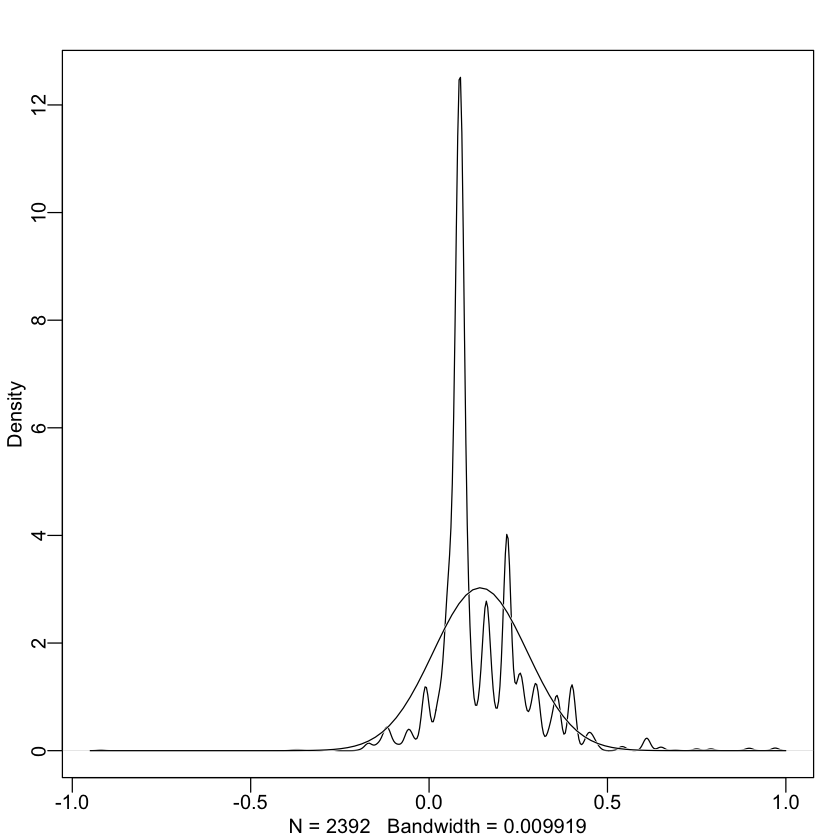

In [27]:
authorMeans <- df %>% 
select(docauthorid, scoreCom) %>% 
group_by(docauthorid) %>% 
mutate(mean = round(mean(scoreCom), digits = 2))%>%
pull(mean)

dens(authorMeans, norm.comp = TRUE)
summary(authorMeans)

      Min.    1st Qu.     Median       Mean    3rd Qu.       Max. 
-1.1406857 -0.1709253  0.0021063  0.0004774  0.1741621  1.2053521 

[1] 0.2671343

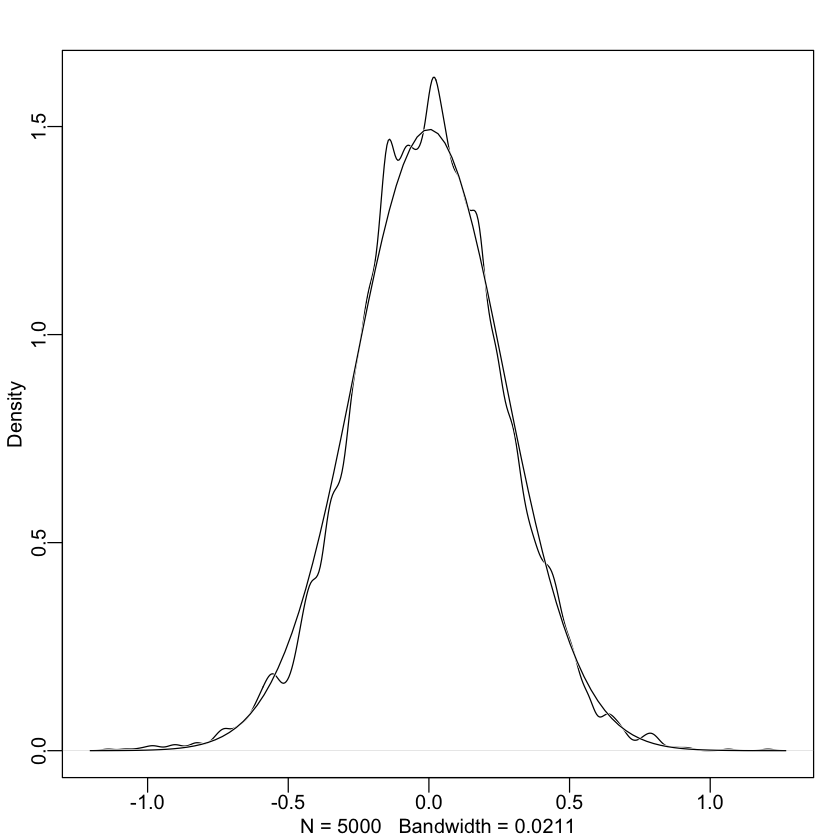

In [39]:
set.seed(5)

# Compound Sentiment
sample_mu <- rnorm( 5000 , 0 , .2)
sample_sigma <- runif( 5000 , 0 , .3)
prior_h <- rnorm( 5000 , sample_mu , sample_sigma )
dens(prior_h, norm.comp = TRUE)
summary(prior_h)
sd(prior_h)

The following series of prior predictive visualizations is adapted from https://bookdown.org/content/4857/geocentric-models.html

In [40]:
p1 <-
  tibble(x = seq(from = -1, to = 1, by = .01)) %>% 
  
  ggplot(aes(x = x, y = dnorm(x, mean = 0, sd = .2))) +
  geom_line() +
  scale_x_continuous(breaks = seq(from = -1, to = 1, by = .5)) +
  scale_y_continuous(NULL, breaks = NULL) +
theme(panel.grid = element_blank())+
  labs(title = "", #mu ~ dnorm(0, .1)
       y = "density")

p2 <-
  tibble(x = seq(from = -.1, to = .4, by = .001)) %>%
  
  ggplot(aes(x = x, y = dunif(x, min = 0, max = .3))) +
  geom_line() +
  scale_x_continuous(breaks = c(0, .3)) +
  scale_y_continuous(NULL, breaks = NULL) +
  ggtitle("Compound Sentiment Score") + #sigma ~ dunif(0, .3)
  theme(plot.title = element_text(hjust = 0.5))

n <- 1e4

set.seed(5)

sim <-
  tibble(sample_mu    = rnorm(n, mean = 0, sd  = .2),
         sample_sigma = runif(n, min = 0, max = .3)) %>% 
  mutate(scoreCom = rnorm(n, mean = sample_mu, sd = sample_sigma))
  
p3 <- sim %>% 
  ggplot(aes(x = scoreCom)) +
  geom_density() +
  scale_x_continuous(breaks = seq(from = -1.5, to = 1.5, by = .5))+
  scale_y_continuous(NULL, breaks = NULL) +
  ggtitle("") + #scoreCom ~ dnorm(mu, sigma)
  theme(panel.grid = element_blank())

# What percentage is above or below the Vader scale
sim %>% 
  count(scoreCom < -1 | scoreCom > 1) %>% 
  mutate(percent = 100 * n / sum(n))

summary(sim)

scoreCom < -1 | scoreCom > 1,n,percent
<lgl>,<int>,<dbl>
FALSE,9995,99.95
TRUE,5,0.05


   sample_mu           sample_sigma           scoreCom         
 Min.   :-0.8298909   Min.   :0.00005432   Min.   :-1.1304763  
 1st Qu.:-0.1362585   1st Qu.:0.07356708   1st Qu.:-0.1758728  
 Median :-0.0011330   Median :0.14661744   Median : 0.0012627  
 Mean   : 0.0003621   Mean   :0.14825458   Mean   :-0.0003561  
 3rd Qu.: 0.1373453   3rd Qu.:0.22308061   3rd Qu.: 0.1697435  
 Max.   : 0.7207091   Max.   :0.29997330   Max.   : 1.0358803  

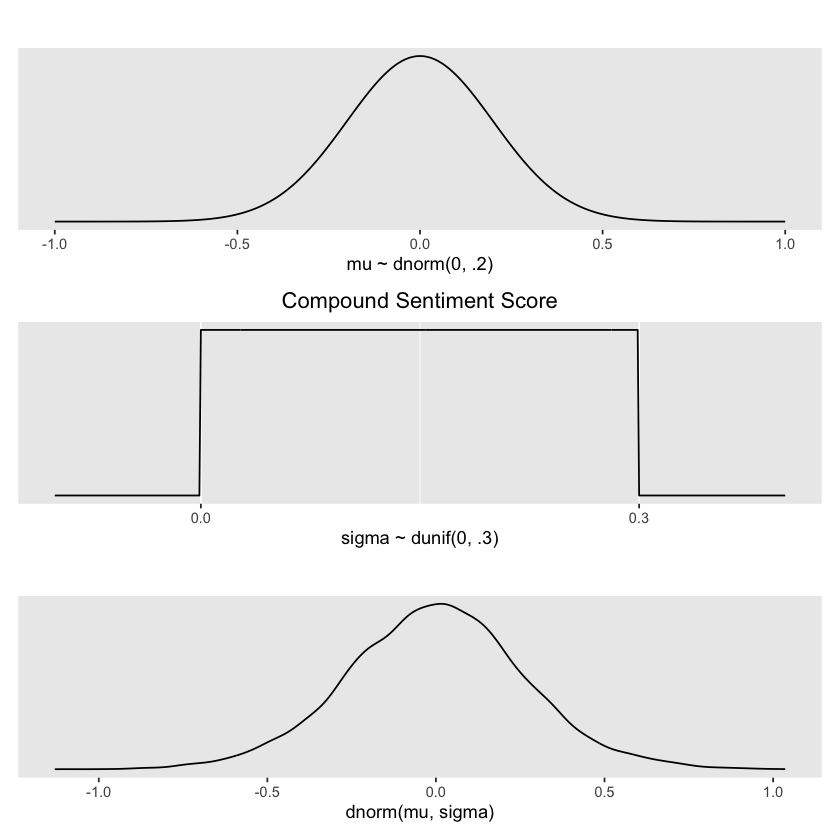

In [41]:
(p1 + xlab("mu ~ dnorm(0, .2)")) /
(p2 + xlab("sigma ~ dunif(0, .3)")) /
(p3 + xlab("dnorm(mu, sigma)"))

<h3>Model Specification</h3>

$$scoreCompound_{i} \sim Normal(\mu, \sigma)$$
$$\mu \sim Normal(0,.2)$$
$$\sigma \sim Uniform(0,.3)$$

See McElreath (2020, p. 82), 20190117_PM_Slides.pdf (slides 7-8) for model specification.

In [43]:
# Define the model - compound sentiment
m1 <- alist(scoreCom ~ dnorm(mu,sigma),
            mu ~ dnorm(0,.2),
            sigma ~ dunif(0,.3)
)

f1 <- quap(m1,data=df)

#f1 <- readRDS("20250318_PhD_LtrChkScoCom-cp.rds")
summary(f1)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
mu,0.1424183,0.005937627,0.1329289,0.1519078
sigma,0.2905259,0.004200163,0.2838133,0.2972386


## Posterior predictive checks

       mu             sigma       
 Min.   :0.1218   Min.   :0.2750  
 1st Qu.:0.1384   1st Qu.:0.2876  
 Median :0.1425   Median :0.2905  
 Mean   :0.1425   Mean   :0.2905  
 3rd Qu.:0.1465   3rd Qu.:0.2933  
 Max.   :0.1639   Max.   :0.3049  

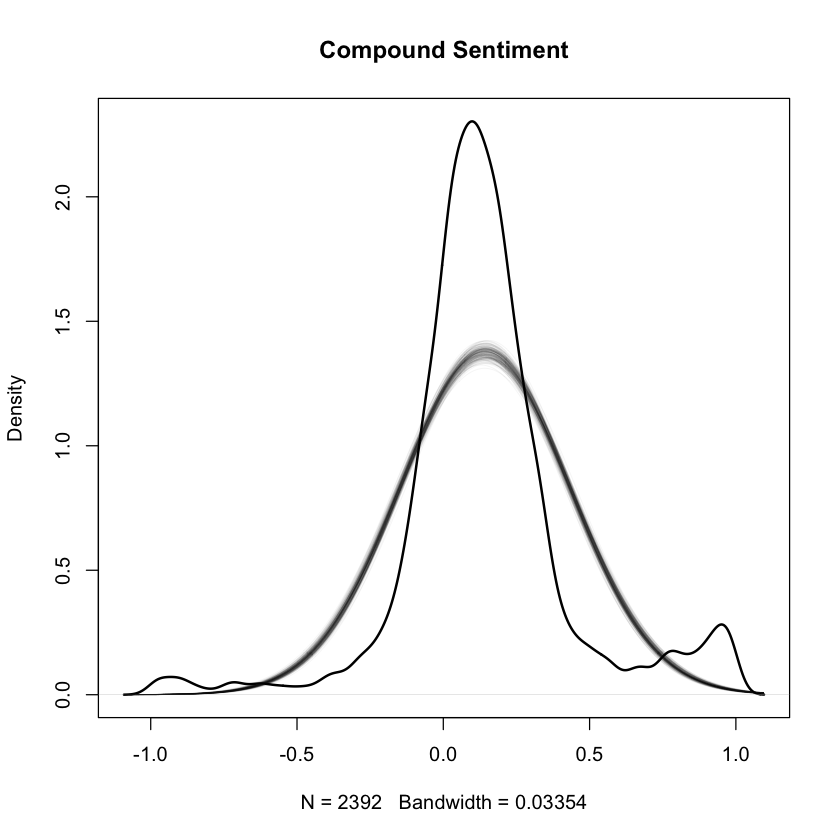

In [44]:
# Get coefficients
mu_fit <- coef(f1)[[1]]
sigma_fit <- coef(f1)[[2]]

# draw 5000 samples from the joint posterior
coef_samp <- extract.samples(f1,5000)

# convert to dataframe
coef_samp <- as.data.frame(coef_samp)
summary(coef_samp)

# actual data
den <- density(df$scoreCom)
plot(den,lwd=2,,main="Compound Sentiment")

# samples from the posterior
for(i in 1:200){
    y_fit <- dnorm(den$x,coef_samp[i,1],coef_samp[i,2])
    lines(den$x,y_fit,lwd=.5,col='#00000010')
}

In [45]:
saveRDS(f1, file = "20250318_PhD_LtrChkScoCom-cp.rds")

## Predictor Variables

## Topics

In [49]:
# Get counts for topic number
table(as.factor(df$topicNumber))
#sum(is.na(df$topicNumber))


  0   1   2   3   4   5   6   7   8   9  10 
173 159 227 299 266 182 171 292 147 262 214 


  0   1   2   3   4   5   6   7   8   9  10 
173 159 227 299 266 182 171 292 147 262 214 

topicLabel,n,pct
<fct>,<dbl>,<dbl>
04 Correspondence,299,0.12
08 Family Life,292,0.12
05 People,266,0.11
10 Difficulty,262,0.11
03 Farming,227,0.09
11 Government,214,0.09
06 Setting,182,0.08
01 Weather,173,0.07
07 Contemplation,171,0.07


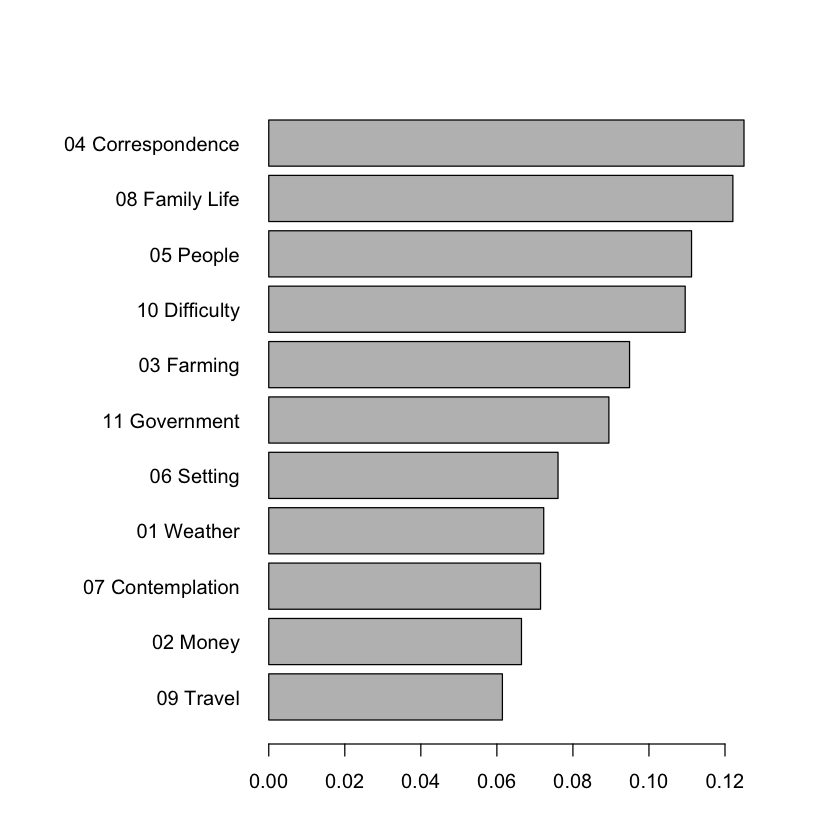

In [90]:
# Get counts for topic number
table(as.factor(df$topicNumber))

# Create new variable with topic labels that match pyLDAvis label numbers
df$topicLabel <- as.character(df$topicNumber)
df$topicLabel[df$topicLabel=="0"]  <- "01 Weather"
df$topicLabel[df$topicLabel=="1"]  <- "02 Money"
df$topicLabel[df$topicLabel=="2"]  <- "03 Farming"
df$topicLabel[df$topicLabel=="3"]  <- "04 Correspondence"
df$topicLabel[df$topicLabel=="4"]  <- "05 People"
df$topicLabel[df$topicLabel=="5"]  <- "06 Setting"
df$topicLabel[df$topicLabel=="6"]  <- "07 Contemplation"
df$topicLabel[df$topicLabel=="7"]  <- "08 Family Life"
df$topicLabel[df$topicLabel=="8"]  <- "09 Travel"
df$topicLabel[df$topicLabel=="9"]  <- "10 Difficulty"
df$topicLabel[df$topicLabel=="10"]  <- "11 Government"
df$topicLabel <- as.factor(df$topicLabel)

#Check 
df %>% 
group_by(topicLabel) %>% 
count() %>% mutate(pct=n/nrow(df)) %>% 
arrange(desc(pct)) %>%
mutate(across(where(is.numeric), round, 2))

# Visualize
par(mar=(c(4,11,4,4)))
barplot(prop.table(sort(table(df$topicLabel), decreasing = FALSE)), horiz = TRUE, las=1)

In [52]:
# Subsetting
df2 <- df[df$docauthorid %in% ids, ]
df2 <- droplevels(df2)
table(df2$docauthorid, df2$topicNumber)

vals <- c("per0004772", "per0038009")
df %>% filter(docauthorid %in% vals) %>% select(authorName, docauthorid) %>% unique()

vals <- c("6", "7", "9")
df %>% filter(topicNumber %in% vals) %>% select(topicNumber, topicLabel) %>% unique()

             
                0   1   2   3   4   5   6   7   8   9  10
  IED0030       0   1   0   9   2   0   0  11   0   1   0
  IED0037       8   0   2  21   1  10   5   8   4   2   4
  IED0107       2   0   0  25   0   0   0   6   0   1   0
  IED0125       3   0   0   6   0   1   0   0   0   0   0
  IED0212       4   1   1   4  16   0   4   1   0  22   1
  IED0233       0   1   1   1   0   7   0   0   0   0   0
  IED0267       4   0   0   0  13   0   0   6   0   0   5
  IED0294       0   0   0   3  11   0   0   0   0   3   0
  IED0314      17   0   0   7   0  33   4   5  17   0   1
  IED0374       0   7   0   1  17   0   0   1   0   6   0
  IED0403       0   3   1   1  12   0   0   0   0   0   0
  IED0572       0   0   0   1   0   0   1   0   0  11   0
  IED0621       1   0   2   8   4   0   0   2   2   1   1
  IED0657       0   1   0   1   6   0   0   1   0   3   0
  IED0661      37   0   5  82   3  30   3   2  13  19   3
  IED0692       0   9   1   0   9   2   0   1   0   1   0


,authorName,docauthorid
,<fct>,<fct>
1,Susannah Strickland Moodie,per0004772
461,Sarah Stretch Harris,per0038009


,topicNumber,topicLabel
,<int>,<fct>
1,6,07 Contemplation
2,9,10 Difficulty
13,7,08 Family Life


These topics are less author-centric. Susannah Strickland Moodie is mostly responsible for Contemplation and Difficulty, and Sarah Stretch Harris is mostly responsible for Family Life. In both cases, though, other writers are associated with this topic too.

In [91]:
#table(df$topicLabel, df$docauthorid)
topicCounts <- df %>% 
  group_by(authorName, topicLabel, .drop = FALSE) %>% 
  summarise(n = n(), .groups = 'drop')%>%
pivot_wider(names_from = topicLabel, values_from = n)%>%
#t()%>%
data.frame()%>%
rename(Author = 1, Weather = 2, Money = 3, Farming = 4, Correspondence = 5, People = 6, Setting = 7, Contemplation = 8, FamilyLife = 9, Travel = 10, Difficulty = 11, Government = 12)%>%
arrange(desc(Setting))
        
#slice(-1)
#as.matrix(topicCounts)
topicCounts

Author,Weather,Money,Farming,Correspondence,People,Setting,Contemplation,FamilyLife,Travel,Difficulty,Government
<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
Isabella Marshall Allen,17,0,0,7,0,33,4,5,17,0,1
Susannah Strickland Moodie,16,12,4,27,15,32,137,27,10,163,17
Mary Cumming,37,0,5,82,3,30,3,2,13,19,3
Sarah Stretch Harris,6,15,5,7,3,20,9,171,10,8,5
NA,11,31,82,1,1,11,0,2,36,1,39
Agnes Shakespeare,8,0,2,21,1,10,5,8,4,2,4
George McCann,0,1,1,1,0,7,0,0,0,0,0
Alexander Robb,8,6,13,18,8,4,0,0,0,0,5
Critchlow Harris,0,3,21,3,1,4,0,10,2,3,5


In [92]:
37/173 # Weather
31/159 # Money
82/227 # Farming
82/299 # Correspondence
22/266 # People
33/182 # Setting
137/171 # Contemplation
171/292 # Family Life
36/147 # Travel
163/262 # Difficulty
39/214 # Government

[1] 0.2138728

[1] 0.1949686

[1] 0.3612335

[1] 0.2742475

[1] 0.08270677

[1] 0.1813187

[1] 0.8011696

[1] 0.5856164

[1] 0.244898

[1] 0.6221374

[1] 0.182243

## Socials

### External Person Mentions

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.000000 0.007491 0.018051 0.021581 0.032609 0.142857 

[1] 0.01807528

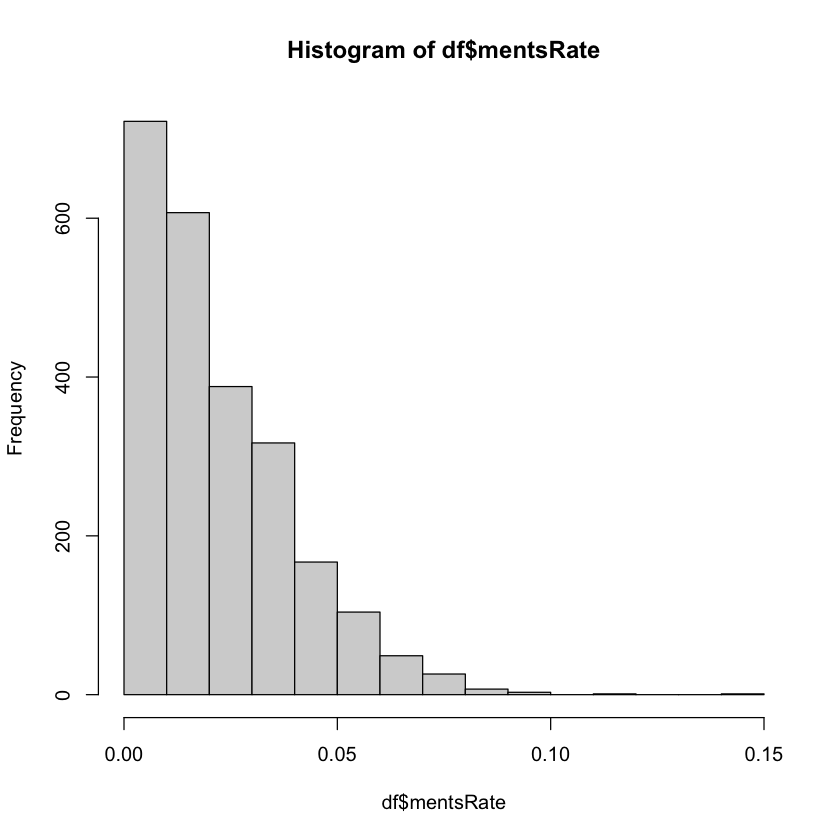

In [72]:
# Create a new token that reflects the rate of total individuals relative to total tokens
df$mentsRate <- df$mentsTot/df$totalTokens
summary(df$mentsRate)
hist(df$mentsRate)
sd(df$mentsRate)

Saving 7 x 7 in image


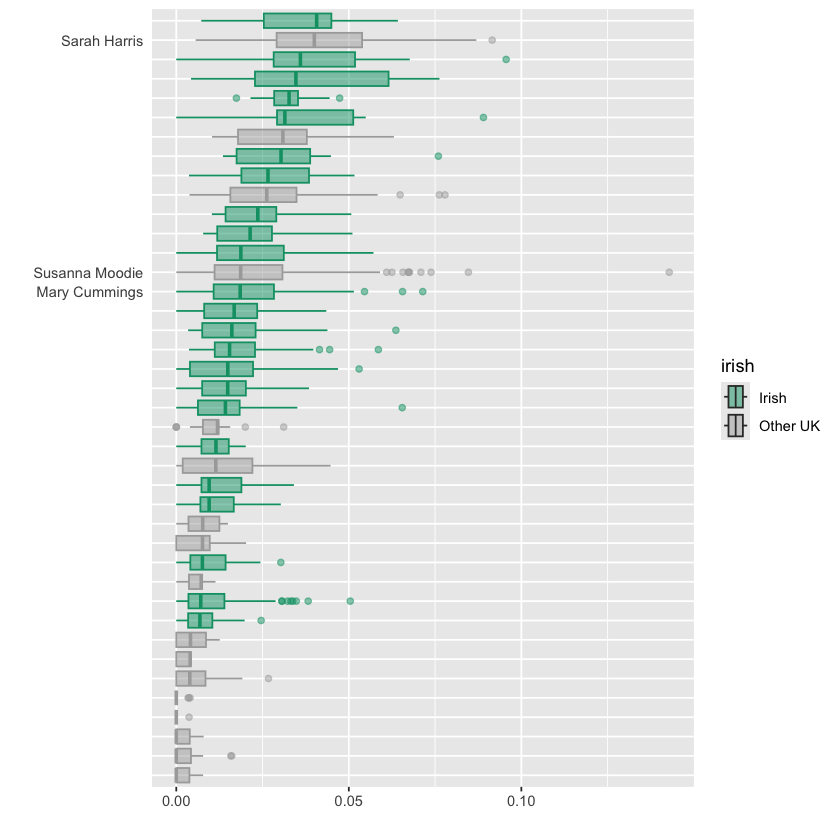

In [54]:
# Highly represented authors
df2 <- df %>% 
group_by(docauthorid) %>% 
count() %>%
arrange(desc(n)) %>% 
filter (n >= 10) 

ids  <- df2 %>%
pull(docauthorid)

df2 <- df[df$docauthorid %in% ids, ]

df2$irish <- as.character(df2$irish)
df2$irish[df2$irish=="True"]<-"Irish"
df2$irish[df2$irish=="False"]<-"Other UK"
df2$irish <- as.factor(df2$irish)
df2$authorGender <- as.character(df2$authorGender)
df2$authorGender[df2$authorGender=="F"]<-"Female"
df2$authorGender[df2$authorGender=="M"]<-"Male"
df2$authorGender <- as.factor(df2$authorGender)

# Changing tick labels
tickLabels<-df2 %>% 
select(docauthorid, mentsRate) %>% 
group_by(docauthorid) %>% 
summarize(min = min(mentsRate),
          median = median(mentsRate),
          max = max(mentsRate), 
          sd = sd(mentsRate))%>%
arrange(median)
tickLabels$docauthorid <- as.character(tickLabels$docauthorid)
tickLabels$docauthorid[tickLabels$docauthorid == "per0038009"] <- "Sarah Harris"
tickLabels$docauthorid[tickLabels$docauthorid == "per0004772"] <- "Susanna Moodie"
tickLabels$docauthorid[tickLabels$docauthorid == "IED0661"] <- "Mary Cummings"
tickLabels$docauthorid[grepl("IED", tickLabels$docauthorid)] <- ""
tickLabels$docauthorid[grepl("per", tickLabels$docauthorid)] <- ""
tickLabels$docauthorid <- as.factor(tickLabels$docauthorid)
tickLabels<-tickLabels %>% pull(docauthorid)

p1  <- ggplot(df2, aes(x = mentsRate, y = reorder(docauthorid, mentsRate, median), color = irish, fill = irish)) +
geom_boxplot(alpha= .5)+
  theme(axis.ticks.y = element_blank(), 
        #legend.position = c(.85,.15), 
        #legend.background = element_rect(fill="white")
       ) + 
xlab("") +
ylab("")+
  scale_fill_manual(values = c("#009E73", "darkgrey")) +
  scale_color_manual(values = c("#009E73", "darkgrey"), guide = "none")+
scale_y_discrete(labels=tickLabels)

p1 
ggsave("20250314_PhD_LtrChkMen-IriFre.jpg")

In [55]:
df2 <- df[df$docauthorid %in% ids, ]

summary <- df2 %>% 
select(docauthorid, mentsRate) %>% 
group_by(docauthorid) %>% 
summarize(min = round(min(mentsRate), digits = 2),
          mean = round(mean(mentsRate), digits = 2),
          max = round(max(mentsRate), digits = 2), 
          sd = round(sd(mentsRate), digits = 2))%>%
arrange(desc(mean))

prolificID <- c("per0004772", "IED0661", "per0038009")

summary%>%
filter(docauthorid %in% prolificID)%>%
mutate(author = c("Sarah Harris", "Mary Cumming", "Susanna Moodie"))%>%
select(author, min, mean, max, sd)

author,min,mean,max,sd
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Sarah Harris,0.01,0.04,0.09,0.02
Mary Cumming,0.00,0.02,0.07,0.01
Susanna Moodie,0.00,0.02,0.14,0.02


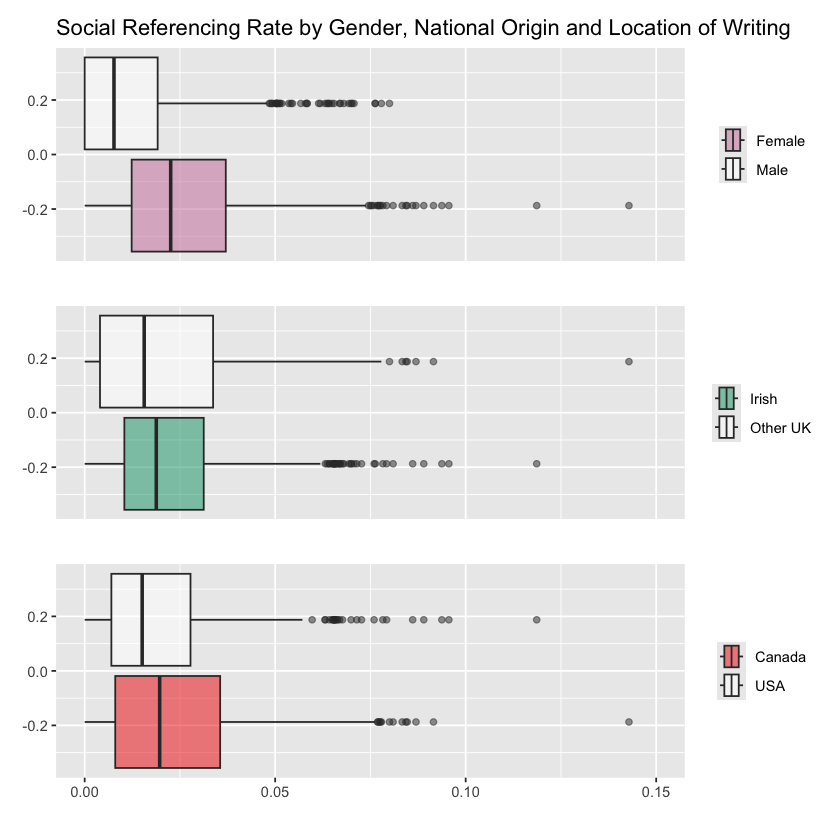

In [73]:
df2 <- df
df2$irish <- as.character(df2$irish)
df2$irish[df2$irish=="True"]<-"Irish"
df2$irish[df2$irish=="False"]<-"Other UK"
df2$irish <- as.factor(df2$irish)
df2$authorGender <- as.character(df2$authorGender)
df2$authorGender[df2$authorGender=="F"]<-"Female"
df2$authorGender[df2$authorGender=="M"]<-"Male"
df2$authorGender <- as.factor(df2$authorGender)

p1 <- ggplot(data=df2, aes(x=mentsRate, group=authorGender, fill=authorGender)) +
ggtitle("Social Referencing Rate by Gender, National Origin and Location of Writing")+
geom_boxplot(alpha=.5)+
#    geom_density(adjust=1.5, alpha=.5) +
scale_fill_manual(values = c("#CC79A7", "white")) +
  scale_color_manual(values = c("#CC79A7", "white"), guide = "none") +
xlab("")+
#ylab("")+
theme(#legend.position = c(0.90, 0.5), 
      axis.text.x = element_blank(), 
      axis.ticks.x = element_blank(),
      legend.title=element_blank())+
coord_cartesian(xlim=c(0, .15))

p2 <- ggplot(data=df2, aes(x=mentsRate, group=irish, fill=irish)) +
geom_boxplot(alpha=.5)+
#geom_density(adjust=1.5, alpha=.5) +
scale_fill_manual(values = c("#009E73", "white")) +
  scale_color_manual(values = c("#009E73", "white"), guide = "none") +
xlab("")+
#ylab("")+
theme(#legend.position = c(0.90, 0.5), 
      axis.text.x = element_blank(), 
      axis.ticks.x = element_blank(),
     legend.title=element_blank())+
coord_cartesian(xlim=c(0, .15))

p3 <- ggplot(data=df2, aes(x=mentsRate, group=authorLocation, fill=authorLocation)) +
geom_boxplot(alpha=.5)+
#geom_density(adjust=1.5, alpha=.5) +
scale_fill_manual(values = c("red2", "white")) +
  scale_color_manual(values = c("red2", "white"), guide = "none") +
xlab("")+
#ylab("")+
theme(#legend.position = c(0.90, 0.5),
     legend.title=element_blank())+
coord_cartesian(xlim=c(0, .15))

p1 / p2  / p3

In [77]:
df2%>%
select(authorGender, mentsRate)%>%
group_by(authorGender)%>%
summarize(min = round(min(mentsRate), digits = 2),
          mean = round(mean(mentsRate), digits = 2),
          max = round(max(mentsRate), digits = 2), 
          sd = round(sd(mentsRate), digits = 2))%>%
arrange(desc(mean))

authorGender,min,mean,max,sd
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
Female,0,0.03,0.14,0.02
Male,0,0.01,0.08,0.02


Calculation error: Multiple-token named entities versus single-token named entities.

### Self-References

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.01916 0.03455 0.03673 0.05186 0.13158 

[1] 0.02287245

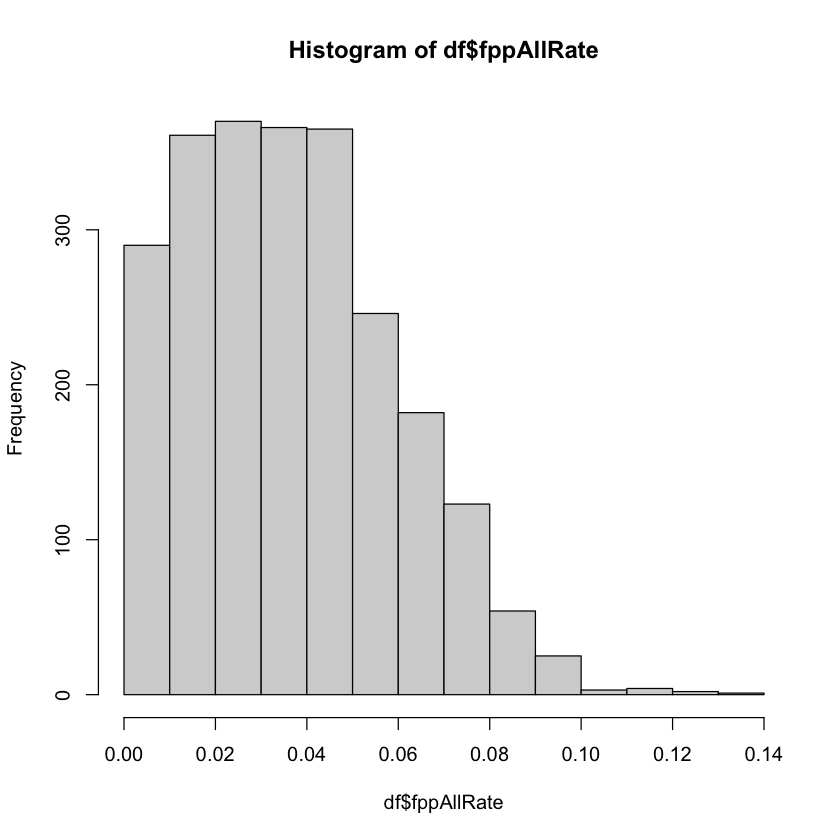

In [7]:
# Create a new token that reflects the rate of all 1st person pronouns relative to total tokens
df$fppAllRate <- df$fppAll_Ct/df$totalTokens
summary(df$fppAllRate)
hist(df$fppAllRate)
sd(df$fppAllRate)

Saving 7 x 7 in image


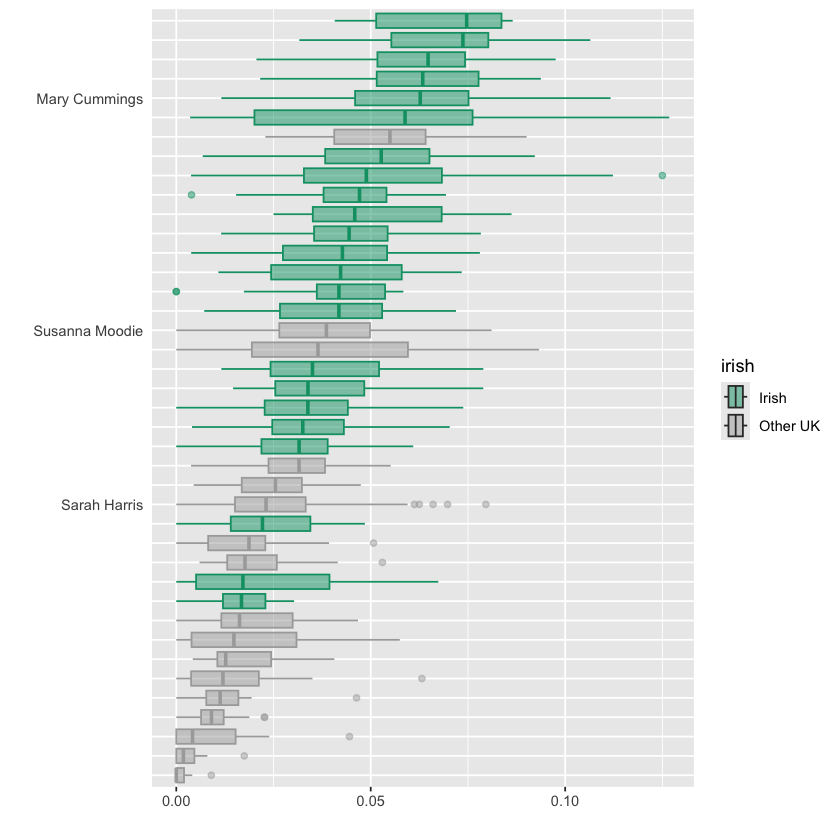

In [10]:
# Highly represented authors
df2 <- df %>% 
group_by(docauthorid) %>% 
count() %>%
arrange(desc(n)) %>% 
filter (n >= 10) 

ids  <- df2 %>%
pull(docauthorid)

df2 <- df[df$docauthorid %in% ids, ]

df2$irish <- as.character(df2$irish)
df2$irish[df2$irish=="True"]<-"Irish"
df2$irish[df2$irish=="False"]<-"Other UK"
df2$irish <- as.factor(df2$irish)
df2$authorGender <- as.character(df2$authorGender)
df2$authorGender[df2$authorGender=="F"]<-"Female"
df2$authorGender[df2$authorGender=="M"]<-"Male"
df2$authorGender <- as.factor(df2$authorGender)

# Changing tick labels
tickLabels<-df2 %>% 
select(docauthorid, fppAllRate) %>% 
group_by(docauthorid) %>% 
summarize(min = min(fppAllRate),
          median = median(fppAllRate),
          max = max(fppAllRate), 
          sd = sd(fppAllRate))%>%
arrange(median)
tickLabels$docauthorid <- as.character(tickLabels$docauthorid)
tickLabels$docauthorid[tickLabels$docauthorid == "per0038009"] <- "Sarah Harris"
tickLabels$docauthorid[tickLabels$docauthorid == "per0004772"] <- "Susanna Moodie"
tickLabels$docauthorid[tickLabels$docauthorid == "IED0661"] <- "Mary Cummings"
tickLabels$docauthorid[grepl("IED", tickLabels$docauthorid)] <- ""
tickLabels$docauthorid[grepl("per", tickLabels$docauthorid)] <- ""
tickLabels$docauthorid <- as.factor(tickLabels$docauthorid)
tickLabels<-tickLabels %>% pull(docauthorid)

p1  <- ggplot(df2, aes(x = fppAllRate, y = reorder(docauthorid, fppAllRate, median), color = irish, fill = irish)) +
geom_boxplot(alpha= .5)+
  theme(axis.ticks.y = element_blank(), 
        #legend.position = c(.85,.15), 
        #legend.background = element_rect(fill="white")
       ) + 
xlab("") +
ylab("")+
  scale_fill_manual(values = c("#009E73", "darkgrey")) +
  scale_color_manual(values = c("#009E73", "darkgrey"), guide = "none")+
scale_y_discrete(labels=tickLabels)

p1

ggsave("20240414_PhD_SelRefAll.jpg")

In [59]:
df2 <- df[df$docauthorid %in% ids, ]

summary <- df2 %>% 
select(docauthorid, fppAllRate) %>% 
group_by(docauthorid) %>% 
summarize(min = round(min(fppAllRate), digits = 2),
          mean = round(mean(fppAllRate), digits = 2),
          max = round(max(fppAllRate), digits = 2), 
          sd = round(sd(fppAllRate), digits = 2))%>%
arrange(desc(mean))

prolificID <- c("per0004772", "IED0661", "per0038009")

summary%>%
filter(docauthorid %in% prolificID)%>%
mutate(author = c("Mary Cumming", "Susanna Moodie", "Sarah Harris"))%>%
select(author, min, mean, max, sd)

author,min,mean,max,sd
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Mary Cumming,0.01,0.06,0.11,0.02
Susanna Moodie,0.00,0.04,0.08,0.02
Sarah Harris,0.00,0.02,0.08,0.01


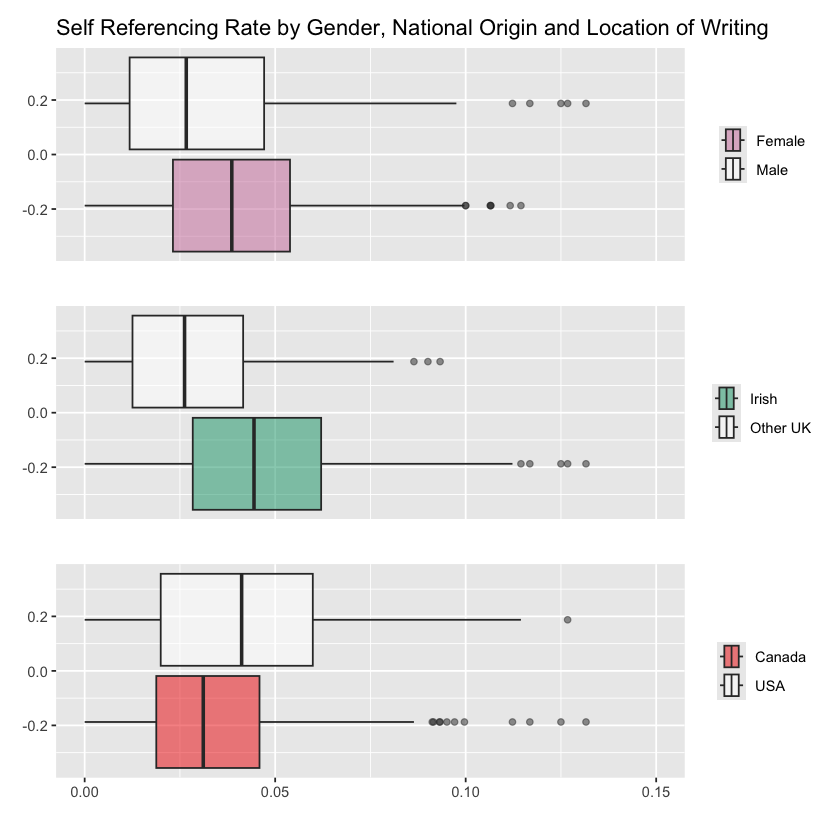

In [80]:
df2 <- df
df2$irish <- as.character(df2$irish)
df2$irish[df2$irish=="True"]<-"Irish"
df2$irish[df2$irish=="False"]<-"Other UK"
df2$irish <- as.factor(df2$irish)
df2$authorGender <- as.character(df2$authorGender)
df2$authorGender[df2$authorGender=="F"]<-"Female"
df2$authorGender[df2$authorGender=="M"]<-"Male"
df2$authorGender <- as.factor(df2$authorGender)

p1 <- ggplot(data=df2, aes(x=fppAllRate, group=authorGender, fill=authorGender)) +
ggtitle("Self Referencing Rate by Gender, National Origin and Location of Writing")+
geom_boxplot(alpha=.5)+
#    geom_density(adjust=1.5, alpha=.5) +
scale_fill_manual(values = c("#CC79A7", "white")) +
  scale_color_manual(values = c("#CC79A7", "white"), guide = "none") +
xlab("")+
#ylab("")+
theme(#legend.position = c(0.90, 0.5), 
      axis.text.x = element_blank(), 
      axis.ticks.x = element_blank(),
      legend.title=element_blank())+
coord_cartesian(xlim=c(0, .15))

p2 <- ggplot(data=df2, aes(x=fppAllRate, group=irish, fill=irish)) +
geom_boxplot(alpha=.5)+
#geom_density(adjust=1.5, alpha=.5) +
scale_fill_manual(values = c("#009E73", "white")) +
  scale_color_manual(values = c("#009E73", "white"), guide = "none") +
xlab("")+
#ylab("")+
theme(#legend.position = c(0.90, 0.5), 
      axis.text.x = element_blank(), 
      axis.ticks.x = element_blank(),
     legend.title=element_blank())+
coord_cartesian(xlim=c(0, .15))

p3 <- ggplot(data=df2, aes(x=fppAllRate, group=authorLocation, fill=authorLocation)) +
geom_boxplot(alpha=.5)+
#geom_density(adjust=1.5, alpha=.5) +
scale_fill_manual(values = c("red2", "white")) +
  scale_color_manual(values = c("red2", "white"), guide = "none") +
xlab("")+
#ylab("")+
theme(#legend.position = c(0.90, 0.5),
     legend.title=element_blank())+
coord_cartesian(xlim=c(0, .15))

p1 / p2  / p3

In [81]:
df2%>%
select(irish, fppAllRate)%>%
group_by(irish)%>%
summarize(min = round(min(fppAllRate), digits = 2),
          mean = round(mean(fppAllRate), digits = 2),
          max = round(max(fppAllRate), digits = 2), 
          sd = round(sd(fppAllRate), digits = 2))%>%
arrange(desc(mean))

irish,min,mean,max,sd
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
Irish,0,0.05,0.13,0.02
Other UK,0,0.03,0.09,0.02


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.01531 0.02867 0.03035 0.04248 0.12676 

[1] 0.01950032

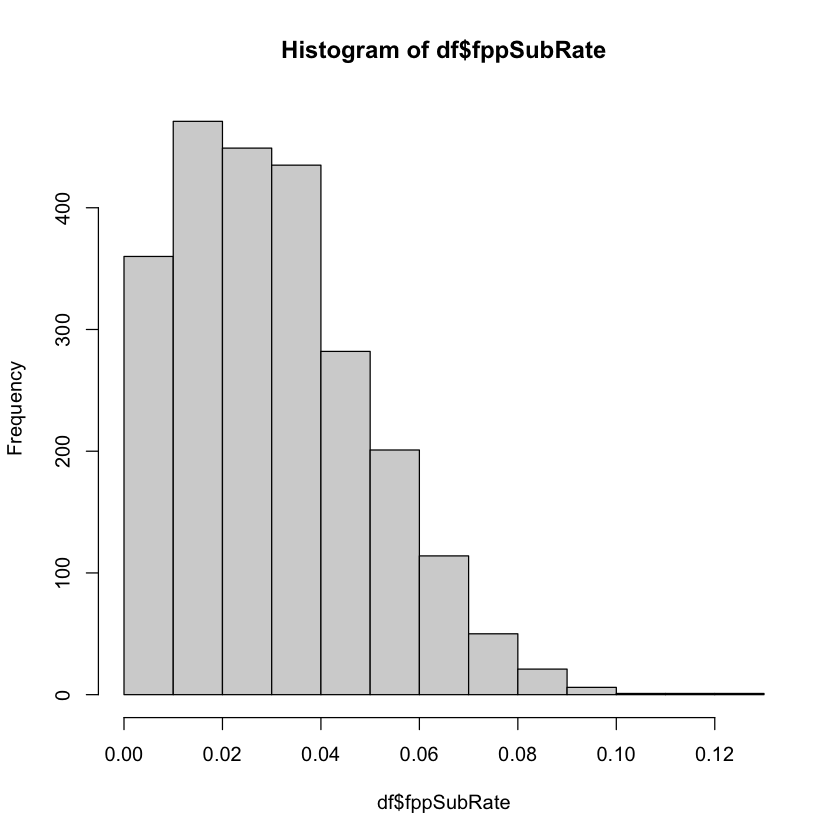

In [82]:
# Create a new token that reflects the rate of subjective first person pronouns to total tokens
df$fppSubRate <- df$fppSub_Ct/df$totalTokens
summary(df$fppSubRate)
hist(df$fppSubRate)
sd(df$fppSubRate)

Saving 7 x 7 in image


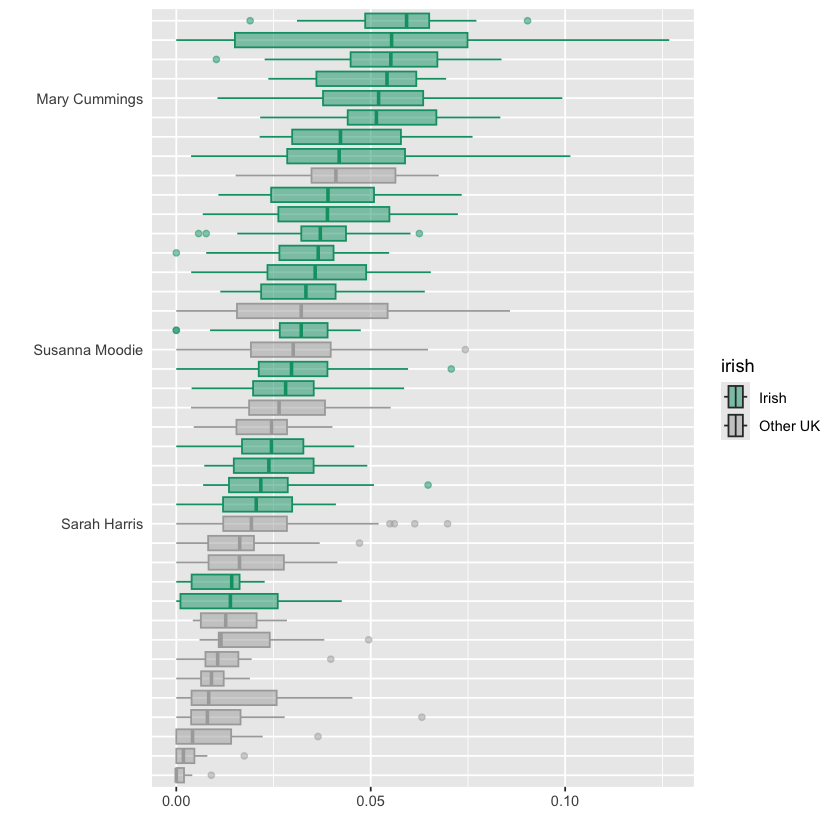

In [61]:
# Highly represented authors
df2 <- df %>% 
group_by(docauthorid) %>% 
count() %>%
arrange(desc(n)) %>% 
filter (n >= 10) 

ids  <- df2 %>%
pull(docauthorid)

df2 <- df[df$docauthorid %in% ids, ]

df2$irish <- as.character(df2$irish)
df2$irish[df2$irish=="True"]<-"Irish"
df2$irish[df2$irish=="False"]<-"Other UK"
df2$irish <- as.factor(df2$irish)
df2$authorGender <- as.character(df2$authorGender)
df2$authorGender[df2$authorGender=="F"]<-"Female"
df2$authorGender[df2$authorGender=="M"]<-"Male"
df2$authorGender <- as.factor(df2$authorGender)

# Changing tick labels
tickLabels<-df2 %>% 
select(docauthorid, fppSubRate) %>% 
group_by(docauthorid) %>% 
summarize(min = min(fppSubRate),
          median = median(fppSubRate),
          max = max(fppSubRate), 
          sd = sd(fppSubRate))%>%
arrange(median)
tickLabels$docauthorid <- as.character(tickLabels$docauthorid)
tickLabels$docauthorid[tickLabels$docauthorid == "per0038009"] <- "Sarah Harris"
tickLabels$docauthorid[tickLabels$docauthorid == "per0004772"] <- "Susanna Moodie"
tickLabels$docauthorid[tickLabels$docauthorid == "IED0661"] <- "Mary Cummings"
tickLabels$docauthorid[grepl("IED", tickLabels$docauthorid)] <- ""
tickLabels$docauthorid[grepl("per", tickLabels$docauthorid)] <- ""
tickLabels$docauthorid <- as.factor(tickLabels$docauthorid)
tickLabels<-tickLabels %>% pull(docauthorid)

p1  <- ggplot(df2, aes(x = fppSubRate, y = reorder(docauthorid, fppSubRate, median), color = irish, fill = irish)) +
geom_boxplot(alpha= .5)+
  theme(axis.ticks.y = element_blank(), 
        #legend.position = c(.85,.15), 
        #legend.background = element_rect(fill="white")
       ) + 
xlab("") +
ylab("")+
  scale_fill_manual(values = c("#009E73", "darkgrey")) +
  scale_color_manual(values = c("#009E73", "darkgrey"), guide = "none")+
scale_y_discrete(labels=tickLabels)

p1 
ggsave("20250314_PhD_LtrChkSub-IriFre.jpg")

In [62]:
df2 <- df[df$docauthorid %in% ids, ]

summary <- df2 %>% 
select(docauthorid, fppSubRate) %>% 
group_by(docauthorid) %>% 
summarize(min = round(min(fppSubRate), digits = 2),
          mean = round(mean(fppSubRate), digits = 2),
          max = round(max(fppSubRate), digits = 2), 
          sd = round(sd(fppSubRate), digits = 2))%>%
arrange(desc(mean))

prolificID <- c("per0004772", "IED0661", "per0038009")

summary%>%
filter(docauthorid %in% prolificID)%>%
mutate(author = c("Mary Cumming", "Susanna Moodie", "Sarah Harris"))%>%
select(author, min, mean, max, sd)

author,min,mean,max,sd
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Mary Cumming,0.01,0.05,0.10,0.02
Susanna Moodie,0.00,0.03,0.07,0.01
Sarah Harris,0.00,0.02,0.07,0.01


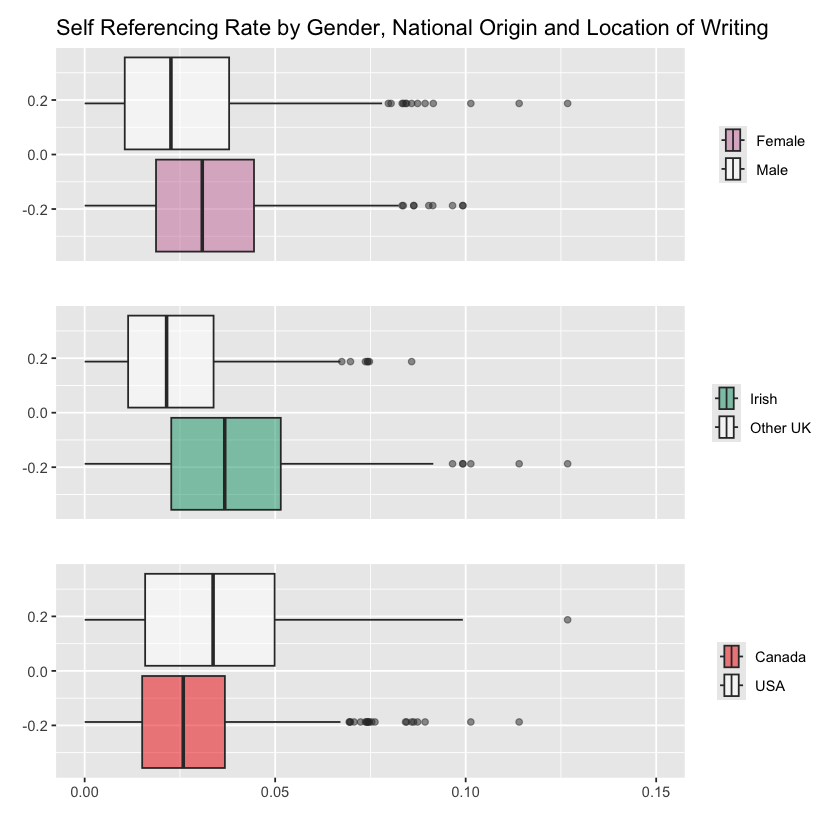

In [83]:
df2 <- df
df2$irish <- as.character(df2$irish)
df2$irish[df2$irish=="True"]<-"Irish"
df2$irish[df2$irish=="False"]<-"Other UK"
df2$irish <- as.factor(df2$irish)
df2$authorGender <- as.character(df2$authorGender)
df2$authorGender[df2$authorGender=="F"]<-"Female"
df2$authorGender[df2$authorGender=="M"]<-"Male"
df2$authorGender <- as.factor(df2$authorGender)

p1 <- ggplot(data=df2, aes(x=fppSubRate, group=authorGender, fill=authorGender)) +
ggtitle("Self Referencing Rate by Gender, National Origin and Location of Writing")+
geom_boxplot(alpha=.5)+
#    geom_density(adjust=1.5, alpha=.5) +
scale_fill_manual(values = c("#CC79A7", "white")) +
  scale_color_manual(values = c("#CC79A7", "white"), guide = "none") +
xlab("")+
#ylab("")+
theme(#legend.position = c(0.90, 0.5), 
      axis.text.x = element_blank(), 
      axis.ticks.x = element_blank(),
      legend.title=element_blank())+
coord_cartesian(xlim=c(0, .15))

p2 <- ggplot(data=df2, aes(x=fppSubRate, group=irish, fill=irish)) +
geom_boxplot(alpha=.5)+
#geom_density(adjust=1.5, alpha=.5) +
scale_fill_manual(values = c("#009E73", "white")) +
  scale_color_manual(values = c("#009E73", "white"), guide = "none") +
xlab("")+
#ylab("")+
theme(#legend.position = c(0.90, 0.5), 
      axis.text.x = element_blank(), 
      axis.ticks.x = element_blank(),
     legend.title=element_blank())+
coord_cartesian(xlim=c(0, .15))

p3 <- ggplot(data=df2, aes(x=fppSubRate, group=authorLocation, fill=authorLocation)) +
geom_boxplot(alpha=.5)+
#geom_density(adjust=1.5, alpha=.5) +
scale_fill_manual(values = c("red2", "white")) +
  scale_color_manual(values = c("red2", "white"), guide = "none") +
xlab("")+
#ylab("")+
theme(#legend.position = c(0.90, 0.5),
     legend.title=element_blank())+
coord_cartesian(xlim=c(0, .15))

p1 / p2  / p3

In [84]:
df2%>%
select(irish, fppSubRate)%>%
group_by(irish)%>%
summarize(min = round(min(fppSubRate), digits = 2),
          mean = round(mean(fppSubRate), digits = 2),
          max = round(max(fppSubRate), digits = 2), 
          sd = round(sd(fppSubRate), digits = 2))%>%
arrange(desc(mean))

irish,min,mean,max,sd
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
Irish,0,0.04,0.13,0.02
Other UK,0,0.02,0.09,0.02


In [63]:
## Check Data and Save

In [64]:
glimpse(df)

Rows: 2,392
Columns: 42
$ docID.AT         <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16…
$ docid            <fct> 20910, 21062, 21062, 21324, 21334, 21334, 21354, 2135…
$ docyear          <int> 1891, 1871, 1871, 1892, 1891, 1891, 1890, 1890, 1800,…
$ docmonth         <dbl> 7, 11, 11, 5, 10, 10, 2, 2, 3, 3, 3, 1, 1, 1, 1, 1, 1…
$ authorName       <fct> Isabella Weir Moore, E. Rothwell, E. Rothwell, Isabel…
$ docauthorid      <fct> IED0107, IED0179, IED0179, IED0107, IED0621, IED0621,…
$ authorLocation   <fct> USA, Canada, Canada, USA, USA, USA, USA, USA, USA, US…
$ authorGender     <fct> F, F, F, F, F, F, M, M, F, F, F, F, F, F, F, F, F, F,…
$ nationalOrigin   <fct> Irish, Irish, Irish, Irish, Irish, Irish, Irish, Iris…
$ irish            <fct> True, True, True, True, True, True, True, True, True,…
$ otherUK          <fct> False, False, False, False, False, False, False, Fals…
$ relMin           <fct> NA, NA, NA, NA, False, False, NA, NA, NA, NA, NA, NA,…
$ catholic      

In [65]:
write.csv(df, "20250318_PhD_LtrChk-RQ1a.csv", row.names=FALSE)